In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [5]:
df = pd.read_csv(r"C:\Users\DYNABOOK\Downloads\Hotel Reservations.csv")

In [7]:
# Convert categorical features using Label Encoding
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

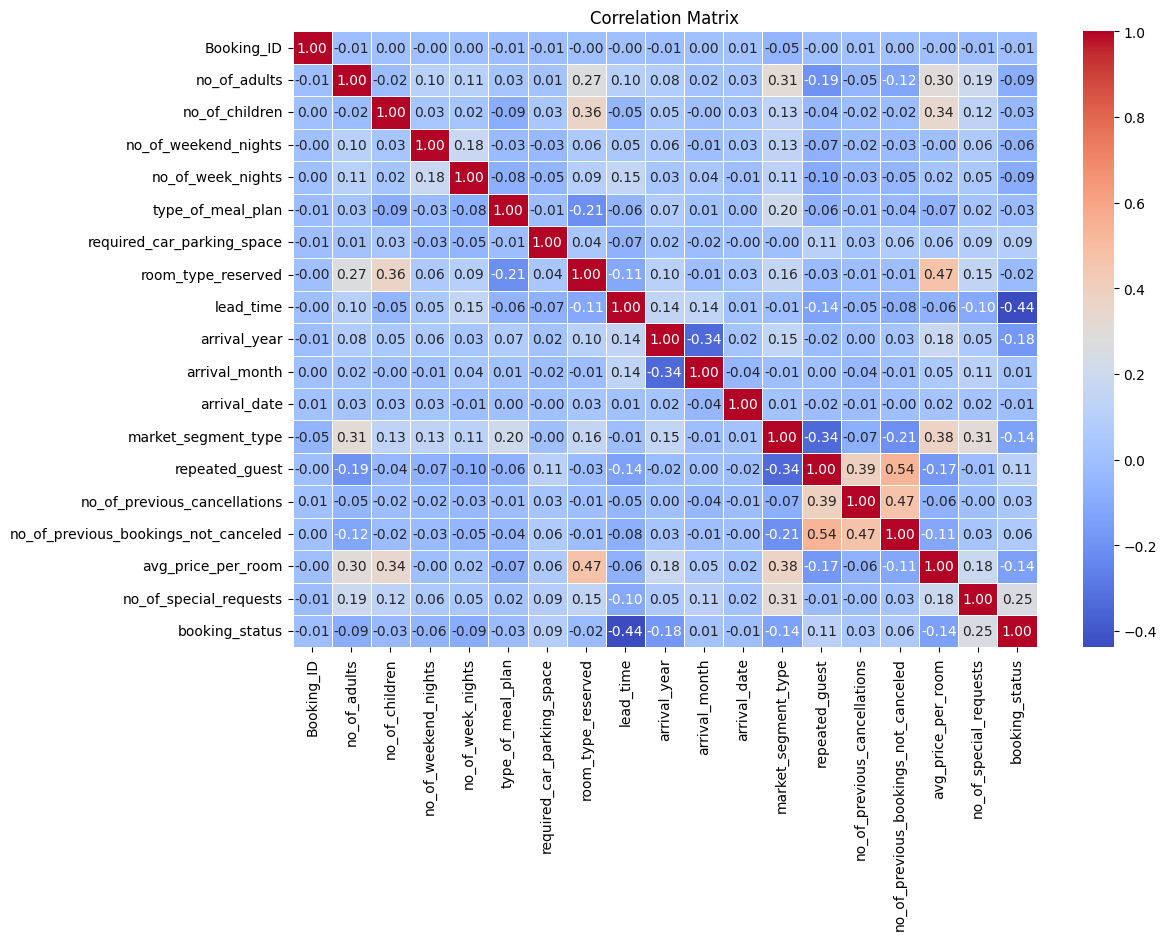

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X.drop(columns=["arrival_year"], errors='ignore'), y)
selected_features = X.drop(columns=["arrival_year"], errors='ignore').columns[selector.get_support()].tolist()
selected_features.append("arrival_year") 
X_selected_df = df[selected_features]
print("Selected Features:", selected_features)

Selected Features: ['Booking_ID', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'arrival_year']


In [15]:

X_selected_df = df[selected_features]  # Selected features from SelectKBest
y = df['booking_status']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8733
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2377
           1       0.88      0.94      0.91      4878

    accuracy                           0.87      7255
   macro avg       0.87      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255



In [16]:
import plotly.express as px

# Count class distribution
class_distribution = df['booking_status'].value_counts().reset_index()
class_distribution.columns = ['booking_status', 'count']

# Plot
fig = px.bar(class_distribution, x='booking_status', y='count', 
             color='booking_status', text='count',
             title="Class Distribution of Booking Status")

fig.show()


In [17]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter

# Define features (X) and target (y)
X = df.drop(columns=['booking_status'])  
y = df['booking_status']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train Random Forest Classifier with class_weight='balanced'
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9039

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      2377
           1       0.91      0.95      0.93      4878

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255


Confusion Matrix:
 [[1918  459]
 [ 238 4640]]


rf model with balancing target variable

In [18]:


# Define features (X) and target (y)
X = df.drop(columns=['booking_status'])  
y = df['booking_status']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier (Basic Version)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8979

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2416
           1       0.91      0.94      0.92      4839

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.90      0.90      0.90      7255


Confusion Matrix:
 [[1948  468]
 [ 273 4566]]


basic rf

In [19]:

from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df.drop(columns=['booking_status'])  
y = df['booking_status']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7814

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.54      0.62      2416
           1       0.80      0.90      0.85      4839

    accuracy                           0.78      7255
   macro avg       0.77      0.72      0.73      7255
weighted avg       0.78      0.78      0.77      7255


Confusion Matrix:
 [[1302 1114]
 [ 472 4367]]


c:\Users\DYNABOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



logistic reg with feature selection

In [20]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df.drop(columns=['booking_status'])  # Change target column if needed
y = df['booking_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.8761
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      2416
           1       0.89      0.93      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.87      0.85      0.86      7255
weighted avg       0.87      0.88      0.87      7255



In [23]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Initialize model
xgb_model = xgb.XGBClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best XGBoost Parameters:", grid_search.best_params_)

# Train with Best Parameters
best_xgb = xgb.XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

# Predict & evaluate
y_pred = best_xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
XGBoost Accuracy: 0.8907
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2416
           1       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255

